In [1]:
import warnings
warnings.filterwarnings("ignore")

import datetime
import inspect
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
repo_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'

confirmed_url = repo_url + 'time_series_covid19_confirmed_global.csv'
deaths_url = repo_url + 'time_series_covid19_deaths_global.csv'

In [3]:
data_confirmed = pd.read_csv(confirmed_url)
data_deaths = pd.read_csv(deaths_url)

In [4]:
data_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38113,38129,38140,38143,38162,38165,38196,38243,38288,38304
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,8927,9083,9195,9279,9380,9513,9606,9728,9844,9967
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,42619,43016,43403,43781,44146,44494,44833,45158,45469,45773
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1098,1098,1124,1124,1124,1176,1184,1199,1199,1215
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2332,2415,2471,2551,2624,2654,2729,2777,2805,2876


In [5]:
data_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1401,1401,1402,1402,1402,1402,1406,1409,1409,1409
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,263,266,271,275,280,284,290,296,301,306
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1465,1475,1483,1491,1501,1510,1518,1523,1529,1539
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,103,105,106,107,107,108,109,112,113,115


In [6]:
del data_confirmed['Lat']
del data_confirmed['Long']
del data_confirmed['Province/State']

del data_deaths['Lat']
del data_deaths['Long']
del data_deaths['Province/State']

In [7]:
data_confirmed.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,38113,38129,38140,38143,38162,38165,38196,38243,38288,38304
1,Albania,0,0,0,0,0,0,0,0,0,...,8927,9083,9195,9279,9380,9513,9606,9728,9844,9967
2,Algeria,0,0,0,0,0,0,0,0,0,...,42619,43016,43403,43781,44146,44494,44833,45158,45469,45773
3,Andorra,0,0,0,0,0,0,0,0,0,...,1098,1098,1124,1124,1124,1176,1184,1199,1199,1215
4,Angola,0,0,0,0,0,0,0,0,0,...,2332,2415,2471,2551,2624,2654,2729,2777,2805,2876


In [8]:
print(len(data_confirmed))
data_confirmed = data_confirmed.groupby(['Country/Region']).sum()
data_deaths = data_deaths.groupby(['Country/Region']).sum()
print(len(data_confirmed))

266
188


In [9]:
data_confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,38113,38129,38140,38143,38162,38165,38196,38243,38288,38304
Albania,0,0,0,0,0,0,0,0,0,0,...,8927,9083,9195,9279,9380,9513,9606,9728,9844,9967
Algeria,0,0,0,0,0,0,0,0,0,0,...,42619,43016,43403,43781,44146,44494,44833,45158,45469,45773
Andorra,0,0,0,0,0,0,0,0,0,0,...,1098,1098,1124,1124,1124,1176,1184,1199,1199,1215
Angola,0,0,0,0,0,0,0,0,0,0,...,2332,2415,2471,2551,2624,2654,2729,2777,2805,2876


In [10]:
data_confirmed.rename(columns={'Country/Region':'Date'}, inplace=True)
data_deaths.rename(columns={'Country/Region':'Date'}, inplace=True)

In [11]:
data_confirmed = data_confirmed.T
data_deaths = data_deaths.T

In [12]:
data_confirmed.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,2,0,0,0,0,0


In [13]:
data_confirmed.index = pd.to_datetime(data_confirmed.index.astype(str), format='%m/%d/%y')
data_deaths.index = pd.to_datetime(data_deaths.index.astype(str), format='%m/%d/%y')

In [14]:
data_confirmed['num_id'] = np.arange(len(data_confirmed) + 1)[1:]
data_deaths['num_id'] = np.arange(len(data_deaths) + 1)[1:]

In [15]:
data_confirmed.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe,num_id
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,2
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,3
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,4
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,0,0,2,0,0,0,0,0,5


In [16]:
data_deaths.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe,num_id
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [17]:
list(data_confirmed.columns)

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

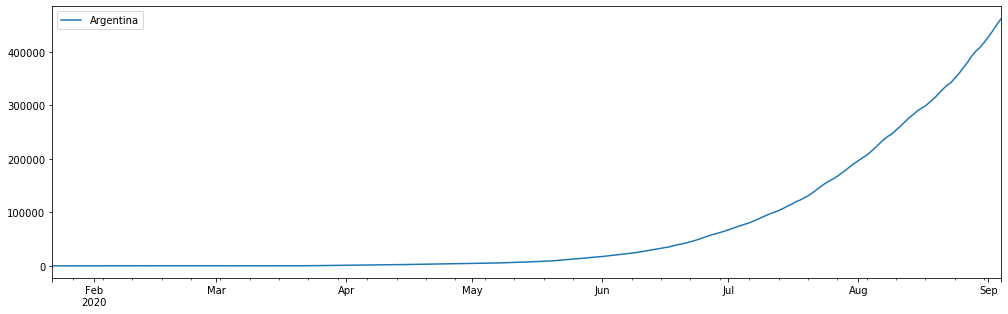

In [18]:
data_confirmed.Argentina.plot(figsize=(17, 5), legend=True)

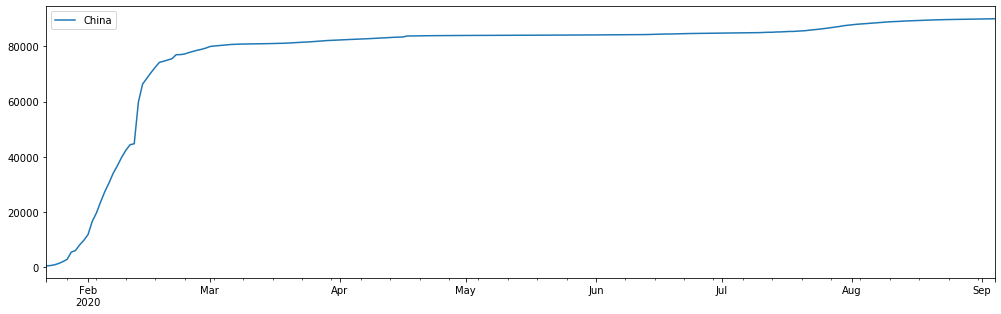

In [19]:
data_confirmed.China.plot(figsize=(17, 5), legend=True)

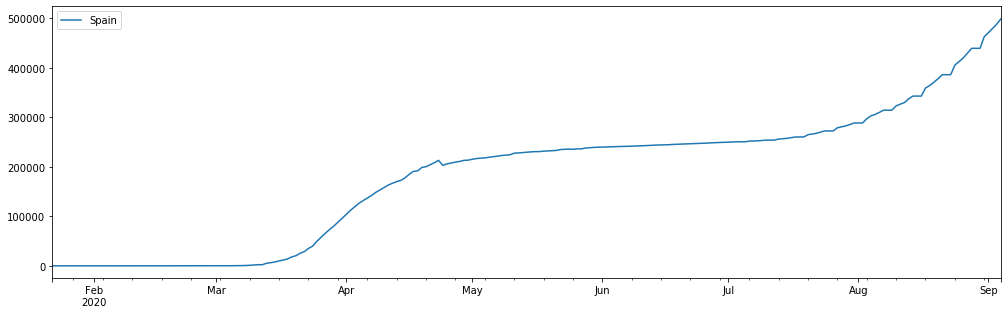

In [20]:
data_confirmed.Spain.plot(figsize=(17, 5), legend=True)

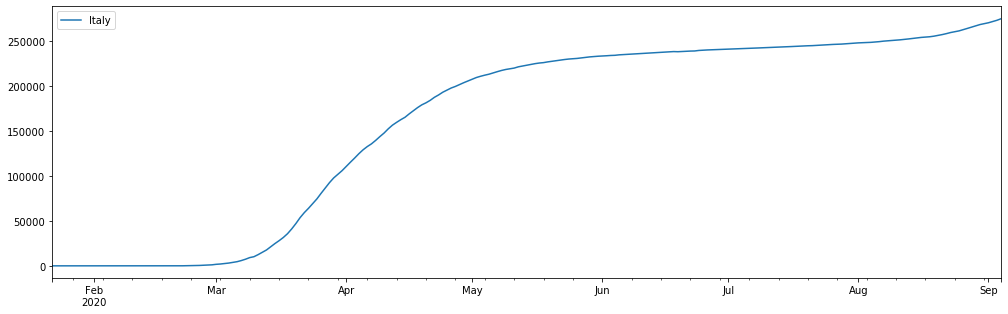

In [21]:
data_confirmed.Italy.plot(figsize=(17, 5), legend=True)

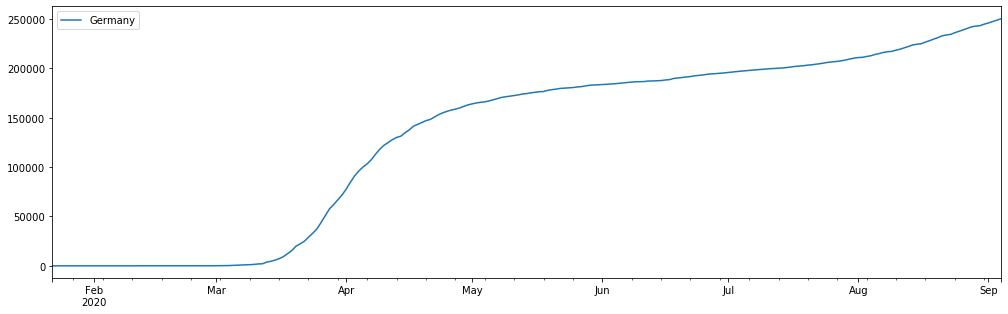

In [22]:
data_confirmed.Germany.plot(figsize=(17, 5), legend=True)

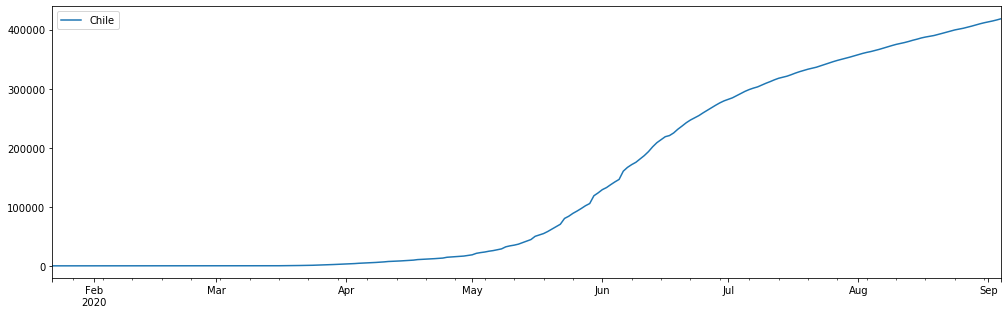

In [23]:
data_confirmed.Chile.plot(figsize=(17, 5), legend=True)

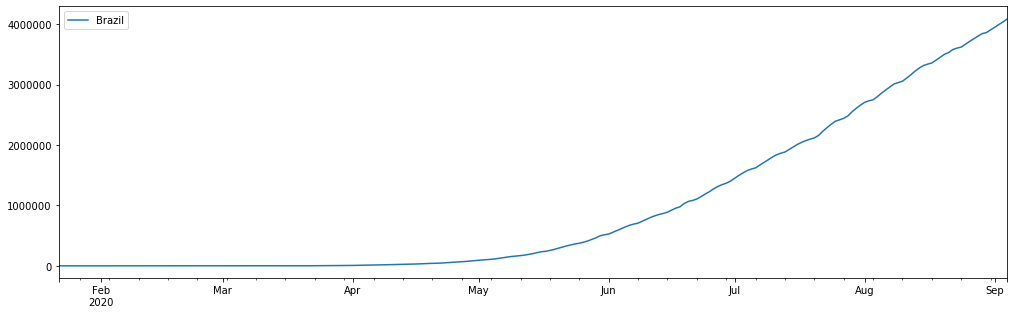

In [24]:
data_confirmed.Brazil.plot(figsize=(17, 5), legend=True)

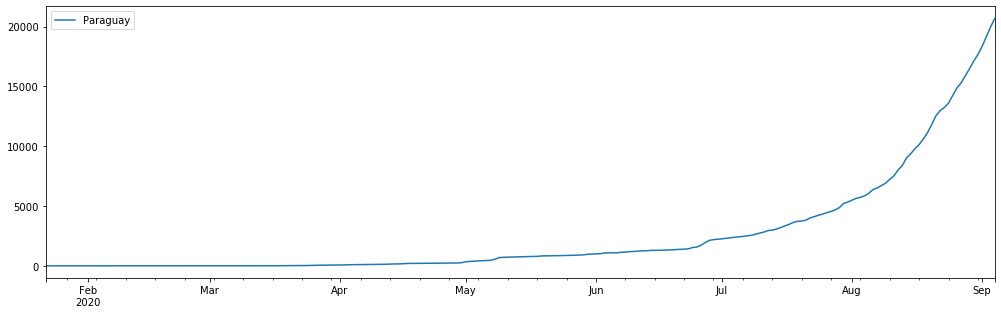

In [25]:
data_confirmed.Paraguay.plot(figsize=(17, 5), legend=True)

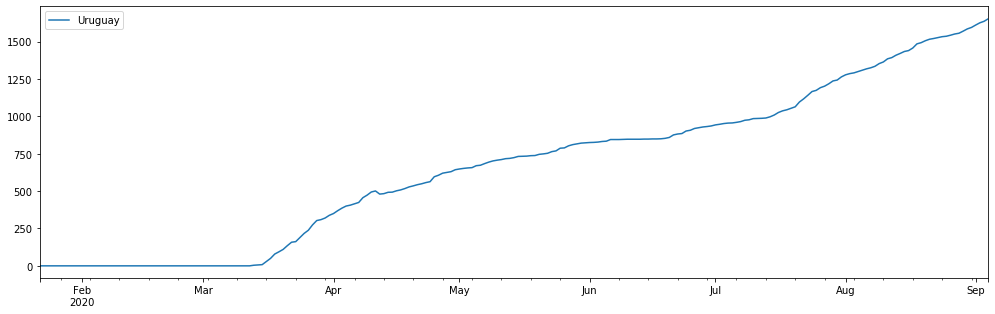

In [26]:
data_confirmed.Uruguay.plot(figsize=(17, 5), legend=True)

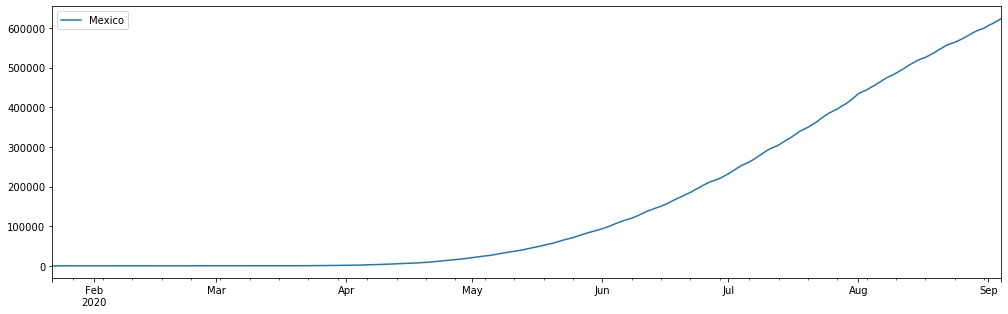

In [27]:
data_confirmed.Mexico.plot(figsize=(17, 5), legend=True)

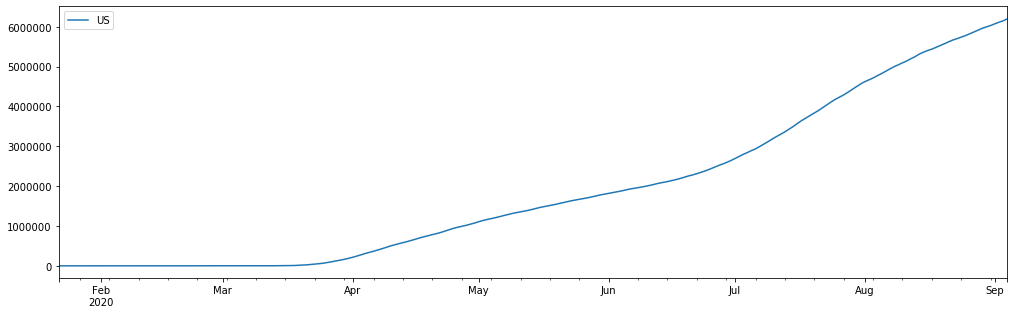

In [28]:
data_confirmed.US.plot(figsize=(17, 5), legend=True)

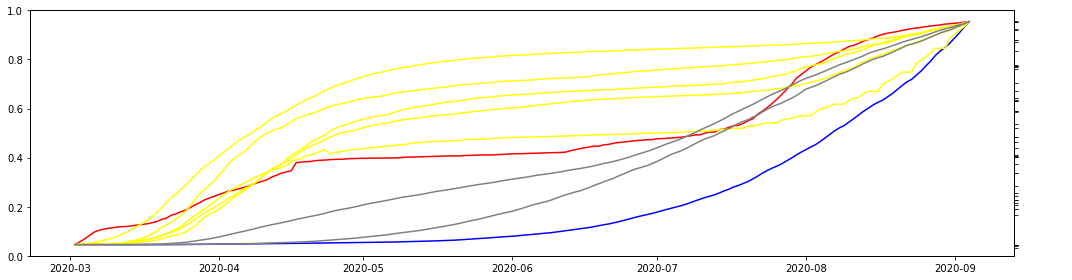

In [29]:
fig, ax1 = plt.subplots(figsize=(15,4), sharex= True, sharey=True)

data_filtered = data_confirmed[data_confirmed.index > '2020-03-01']

countries = ['Argentina','China', 'Belgium', 'Germany', 'Italy', 'Netherlands','Spain', 'Mexico', 'US']
colors = ['blue' ,'red', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'gray', 'gray']

for country, color in zip(countries, colors):
    ax = ax1.twinx()
    ax.plot(data_filtered.index, data_filtered[country], color=color)
    ax.tick_params(axis='y', labelcolor='white')

fig.tight_layout()

plt.show()

In [30]:
data_filtered.tail(2)['num_id']

2020-09-03    226
2020-09-04    227
Name: num_id, dtype: int64

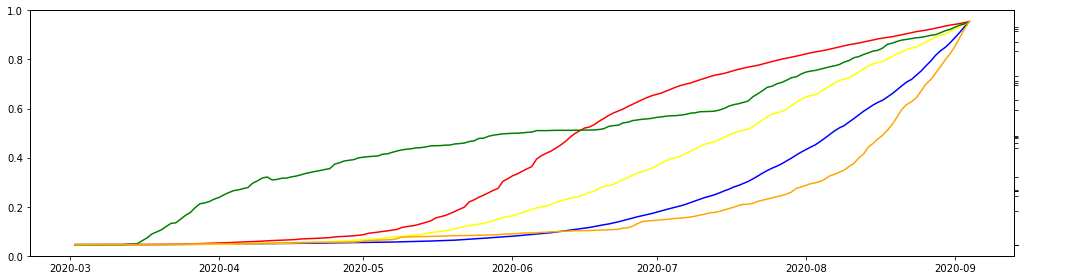

In [31]:
fig, ax1 = plt.subplots(figsize=(15,4), sharex= True, sharey=True)

data_filtered = data_confirmed[data_confirmed.index > '2020-03-01']

countries = ['Argentina','Chile', 'Brazil', 'Uruguay', 'Paraguay']
colors = ['blue' ,'red', 'yellow', 'green', 'orange']

for country, color in zip(countries, colors):
    ax = ax1.twinx()
    ax.plot(data_filtered.index, data_filtered[country], color=color)
    ax.tick_params(axis='y', labelcolor='white')

fig.tight_layout()

plt.show()

In [32]:
countries = ['Argentina',
             'China', 'Belgium', 'Germany', 'Italy', 'Netherlands','Spain', 
             'Chile', 'Brazil', 'Paraguay', 'Uruguay', 
             'Mexico', 'US', 'Canada']

for country in countries:
    dx = np.diff(data_filtered['num_id'])
    dy = np.diff(data_filtered[country])
    d = dy/dx
    print(country + " - " + str(round(d.mean())))

Argentina - 2483.0
China - 53.0
Belgium - 469.0
Germany - 1345.0
Italy - 1466.0
Netherlands - 409.0
Spain - 2682.0
Chile - 2250.0
Brazil - 21999.0
Paraguay - 111.0
Uruguay - 9.0
Mexico - 3350.0
US - 33336.0
Canada - 716.0
